In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('loans_full_schema.csv')

In [3]:
data.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


## Issue with Dataset

1) Data has to many NULL values

2) Data has too many features that are not related for predicting interest rate

In [4]:
data.describe()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,...,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,...,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,...,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,...,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,21.000000,...,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,29.000000,...,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,87.000000,...,3.000000,40000.000000,60.000000,30.940000,1566.590000,40000.000000,41630.443684,40000.000000,4216.440000,52.980000


In [5]:
#Replacing Nan with zeros and infinite value with finite
data.fillna(0)
data.replace([np.inf, -np.inf], np.nan, inplace=True)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

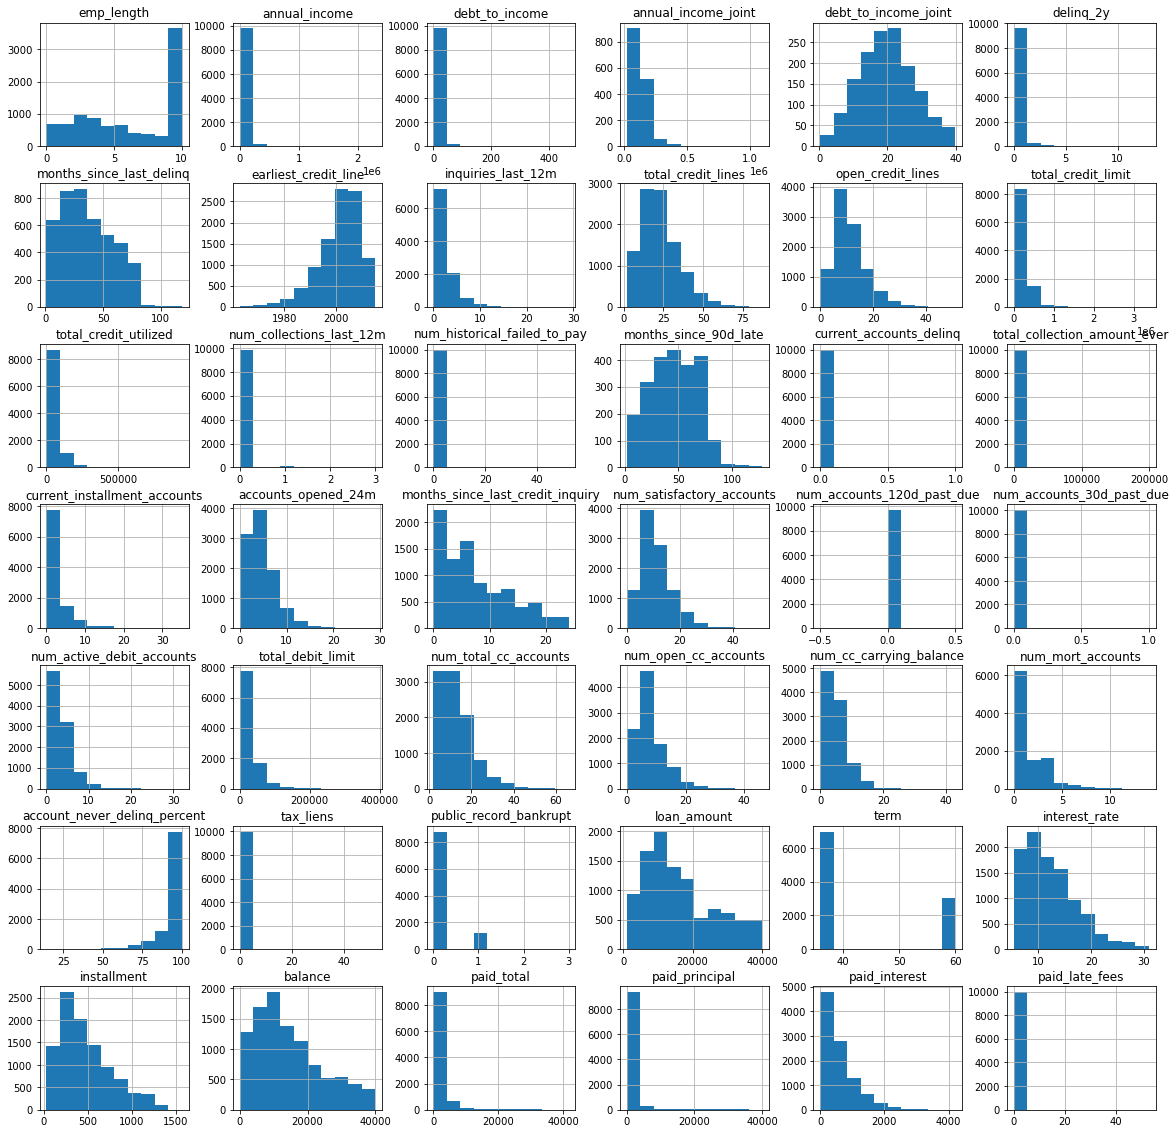

In [7]:
# Below are the histogram of dataset 
data.hist(figsize=(20,20))
plt.show()

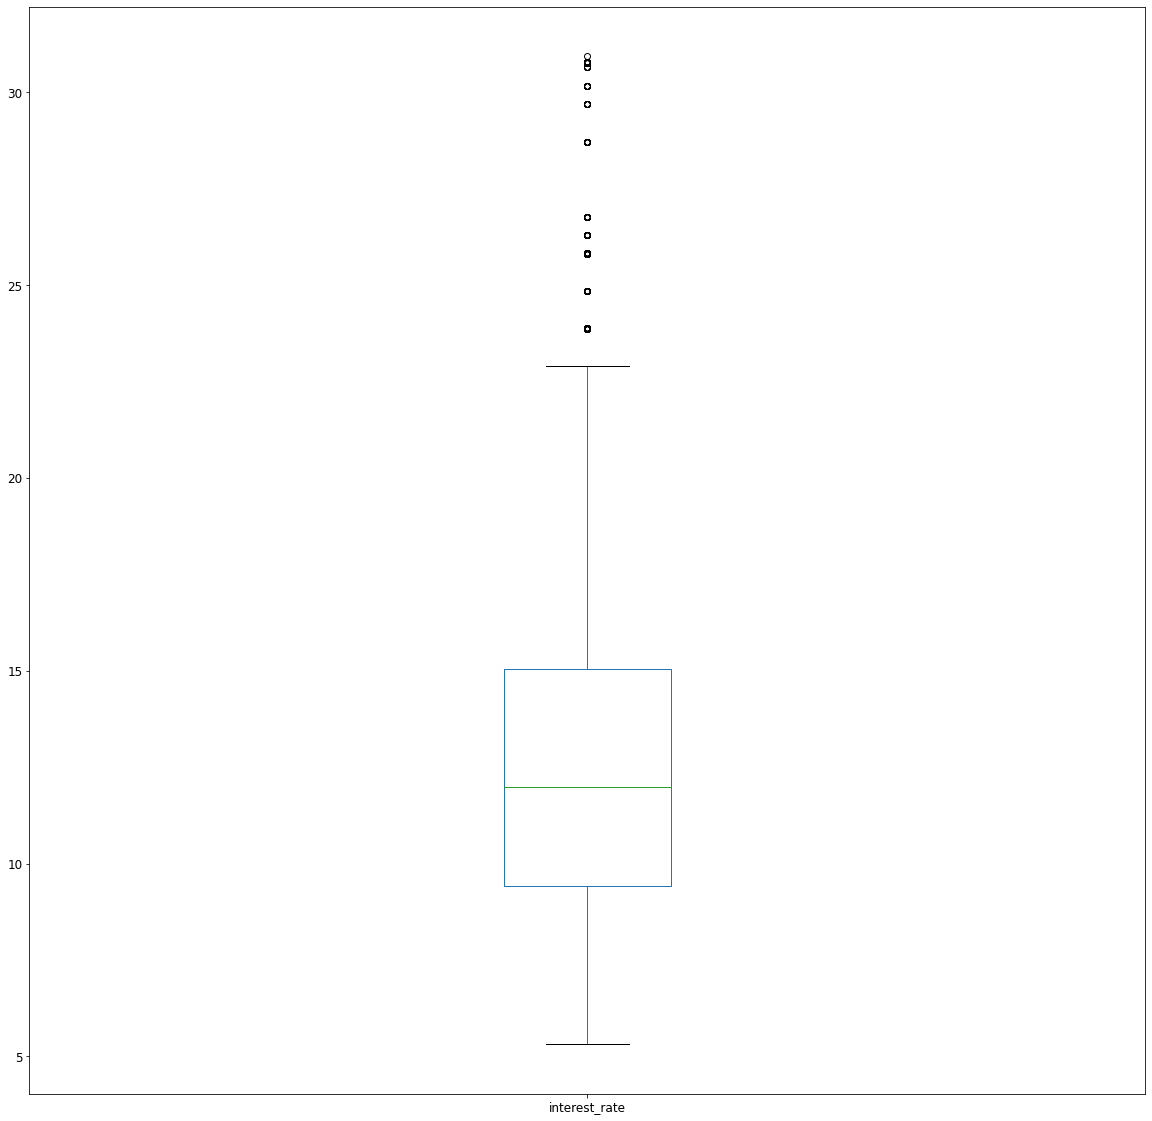

In [8]:
#Below is the box pllot of interset rate that shows the distribution of interest rate with median at around 13.
data.interest_rate.plot(kind='box', subplots=True, figsize=(20,20),fontsize=12)
plt.show()

C:\Users\juits\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


9.93     390
11.99    376
9.44     367
13.59    347
10.42    346
12.62    333
7.35     325
14.08    318
6.72     312
10.91    306
15.05    304
16.02    284
9.43     280
6.08     277
10.90    275
7.97     274
12.61    264
11.98    255
9.92     248
7.34     243
5.32     234
13.58    225
7.96     211
6.07     202
15.04    199
19.03    197
16.01    196
17.09    195
10.41    194
6.71     192
5.31     188
14.07    183
18.06    176
21.45    172
18.45    146
20.00    137
17.47    124
19.42    114
20.39     93
21.85     90
26.30     53
25.82     47
24.85     42
26.77     38
23.88     37
28.72     31
24.84     31
22.91     28
25.81     26
23.87     20
22.90     13
30.79     11
29.69      9
30.17      9
30.65      5
30.75      4
6.00       3
30.94      1
Name: interest_rate, dtype: int64


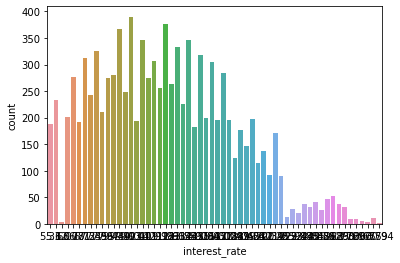

In [9]:
y = data["interest_rate"]
sns.countplot(y)
target = data.interest_rate.value_counts()
print(target)

In [10]:
#This is the correlation matrix that helps to determine that interest rate is dependent on what features so we can
#discard features that are nor relevant
corrMatrix = data.corr()
print (corrMatrix['interest_rate'])

emp_length                         -0.029621
annual_income                      -0.099584
debt_to_income                      0.141653
annual_income_joint                -0.165327
debt_to_income_joint                0.266417
delinq_2y                           0.090456
months_since_last_delinq           -0.082930
earliest_credit_line                0.103635
inquiries_last_12m                  0.131193
total_credit_lines                 -0.044435
open_credit_lines                  -0.012773
total_credit_limit                 -0.130497
total_credit_utilized               0.031527
num_collections_last_12m            0.029901
num_historical_failed_to_pay        0.037563
months_since_90d_late              -0.071466
current_accounts_delinq             0.007184
total_collection_amount_ever        0.013532
current_installment_accounts        0.047131
accounts_opened_24m                 0.120657
months_since_last_credit_inquiry   -0.100945
num_satisfactory_accounts          -0.013330
num_accoun

From above matrix we can say that interest rate is majorly dependent on paid_interest and term.

## Feature Selection and Data Cleansing

We will select feature with correlation value grater than 0 for predicting interest rate.

In [11]:

data=data.drop(columns="emp_length")
data=data.drop(columns="annual_income")
data=data.drop(columns="annual_income_joint")
data=data.drop(columns="months_since_last_delinq")
data=data.drop(columns="total_credit_lines")
data=data.drop(columns="open_credit_lines")
data=data.drop(columns="total_credit_limit")
data=data.drop(columns="months_since_90d_late")
data=data.drop(columns="total_debit_limit")
data=data.drop(columns="num_total_cc_accounts")
data=data.drop(columns="num_open_cc_accounts")
data=data.drop(columns="num_mort_accounts")
data=data.drop(columns="account_never_delinq_percent")
data=data.drop(columns="paid_principal")
data=data.drop(columns="emp_title")
data=data.drop(columns="state")
data=data.drop(columns="homeownership")
data=data.drop(columns="verified_income")
data=data.drop(columns="verification_income_joint")
data=data.drop(columns="issue_month")
data=data.drop(columns="loan_status")
data=data.drop(columns="disbursement_method")
data=data.drop(columns="loan_purpose")
data=data.drop(columns="application_type")

data.head()


,debt_to_income,debt_to_income_joint,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,current_accounts_delinq,total_collection_amount_ever,...,term,interest_rate,installment,grade,sub_grade,initial_listing_status,balance,paid_total,paid_interest,paid_late_fees
0,18.01,NaN,0,2001,6,38767,0,0,0,1250,...,60,14.07,652.53,C,C3,whole,27015.86,1999.33,1015.19,0.0
1,5.04,NaN,0,1996,1,4321,0,1,0,0,...,36,12.61,167.54,C,C1,whole,4651.37,499.12,150.49,0.0
2,21.15,NaN,0,2006,4,16000,0,0,0,432,...,36,17.09,71.40,D,D1,fractional,1824.63,281.80,106.43,0.0
3,10.16,NaN,0,2007,0,4997,0,1,0,0,...,36,6.72,664.19,A,A3,whole,18853.26,3312.89,566.15,0.0
4,57.96,37.66,0,2008,7,52722,0,0,0,0,...,36,14.07,786.87,C,C3,whole,21430.15,2324.65,754.80,0.0


In [12]:
data.grade.unique()

array(['C', 'D', 'A', 'B', 'F', 'E', 'G'], dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
data['grade'] = LE.fit_transform(data['grade'])
data['sub_grade'] = LE.fit_transform(data['sub_grade'])
data['initial_listing_status'] = LE.fit_transform(data['initial_listing_status'])



In [14]:
data = data.reset_index()

In [15]:
x = data.drop("interest_rate",axis=1)
y = data["interest_rate"]

In [16]:
x= np.nan_to_num(x)
y=np.nan_to_num(y)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

## Applying linear regression model for predicting interest rate

In [23]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
print(reg.score(X_test,y_test))


0.9889371038786299


In [24]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)
print(reg.score(X_test,y_test))



0.993241240711424


## Future work

Clearly many things can be done with this data like instead of filling values of Nan with zeros it can be filled with either mean or something else that will help in model.

Secondly, we can plot more graph of interest rate vs features on which it is dependent 